# Logistic Regression Tutorial  
### Machine Learning & Neural Networks
**Dataset:** [Social Network Ads](https://www.kaggle.com/datasets/rakeshrau/social-network-ads)  

This tutorial demonstrates how to implement a **Logistic Regression** model using the Social Network Ads dataset.  
I will walk through data preprocessing, model training, evaluation, and visualization of decision boundaries and ROC curves.  


## Step 1: Import Required Libraries  

In this step, we import essential Python libraries used for data handling, visualization, and machine learning:  

- `pandas`, `numpy`: data manipulation and computation  
- `matplotlib`: plotting graphs and charts  
- `scikit-learn`: training and evaluating the Logistic Regression model  


In [1]:
# Step 1: Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Optional: prettier plots
plt.style.use('ggplot')

## Step 2: Load the Dataset  

We’ll use the **Social Network Ads** dataset.  
It contains information about users, including their gender, age, and estimated salary, and whether they purchased a product.  

This dataset is ideal for a **binary classification problem** — predicting whether a user buys a product or not.  


In [2]:
# Step 2: Load dataset
data = pd.read_csv('Social_Network_Ads.csv')

# Display first few rows
print("Dataset Preview:")
display(data.head())

# Show basic info
print("\nDataset Info:")
print(data.info())


Dataset Preview:


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


## Step 3: Data Preprocessing  

Data preprocessing ensures the dataset is clean and suitable for model training.  
Here we:
* Remove unnecessary columns (`User ID`)  
* Convert categorical variables (`Gender`) into numeric format  
* Split data into **training** and **testing** sets  
* Standardize features to ensure equal weighting  

In [3]:
# Step 3: Data preprocessing

# Drop the 'User ID' column (not useful for prediction)
if 'User ID' in data.columns:
    data = data.drop('User ID', axis=1)

# Convert Gender to numeric (0 = Female, 1 = Male)
if 'Gender' in data.columns:
    data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

# Define features and target
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

# Split into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Preprocessing Complete")

Data Preprocessing Complete


## Step 4: Train the Logistic Regression Model  

We now train the Logistic Regression model on the standardized data.  
Logistic Regression uses a **sigmoid function** to model probabilities for binary outcomes (0 or 1).

In [4]:
# Step 4: Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict test set results
y_pred = model.predict(X_test_scaled)

print("Model Training Complete")

Model Training Complete


## Step 5: Model Evaluation  

Once trained, we evaluate the model’s performance using:  
* **Accuracy:** Overall correctness of the model  
* **Precision & Recall:** Balance between false positives and false negatives  
* **F1-Score:** Harmonic mean of precision and recall  
* **Confusion Matrix:** Visual representation of classification results  

Model Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

Confusion Matrix:
 [[50  2]
 [ 7 21]]


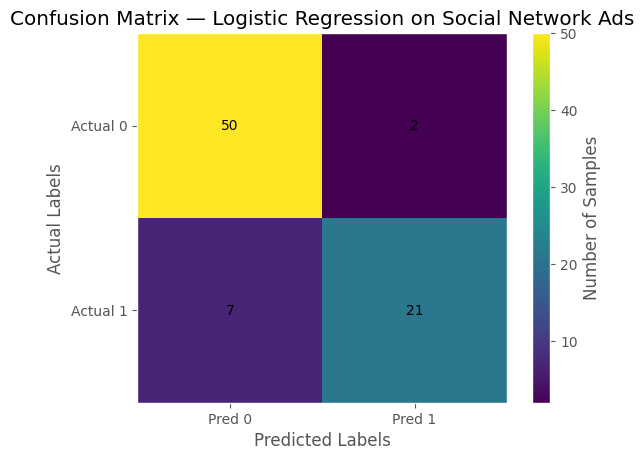

In [5]:
# Step 5: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# confusion matrix using matplotlib
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='viridis') 

# gridlines for better readability
ax.set_xticks(np.arange(len(cm[0])))
ax.set_yticks(np.arange(len(cm)))
ax.set_xticklabels(['Pred 0', 'Pred 1'])
ax.set_yticklabels(['Actual 0', 'Actual 1'])
plt.grid(False)

# labels
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix — Logistic Regression on Social Network Ads')

# colorbar
cbar = plt.colorbar(im)
cbar.set_label('Number of Samples')

# cells with counts
for i in range(len(cm)):
    for j in range(len(cm[0])):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

In [6]:
# Display metrics summary neatly
print("\nPerformance Metrics Summary:")
print(f"Accuracy: {accuracy:.2f}")
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Performance Metrics Summary:
Accuracy: 0.89
Precision: 0.91
Recall: 0.75
F1 Score: 0.82


## Step 6: Visualizing the Decision Boundary  

To better understand model performance, we visualize how Logistic Regression separates the two classes.  
We use **Age** and **Estimated Salary** as key features and plot a **decision boundary** showing predicted classes.  

This visualization helps explain how Logistic Regression forms a linear separation between outcomes.

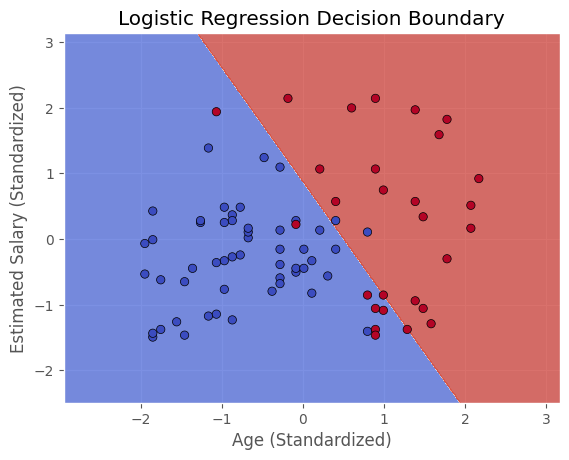

In [7]:
# Step 6: Visualize the Decision Boundary (2D view using Age and Salary)
X_set, y_set = X_test_scaled, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
    np.arange(start=X_set[:, 2].min() - 1, stop=X_set[:, 2].max() + 1, step=0.01)
)

# Predict grid points
preds = model.predict(np.array([np.zeros(X1.ravel().shape), X1.ravel(), X2.ravel()]).T)
preds = preds.reshape(X1.shape)

# Plot
plt.contourf(X1, X2, preds, alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X_set[:, 1], X_set[:, 2], c=y_set, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age (Standardized)')
plt.ylabel('Estimated Salary (Standardized)')
plt.show()

## Understanding the Decision Boundary  

This plot shows how Logistic Regression separates the two classes — purchasers and non-purchasers — based on **Age** and **Estimated Salary**.  

- Each point represents a user from the test set. 
- The points represent actual test data samples:
- Blue points = actual class 0 (did not purchase)
- Red points = actual class 1 (purchased) 
- The **blue** region corresponds to the model predicting "No Purchase", while the **red** region corresponds to "Purchase".  
- The **straight diagonal line** is the decision boundary where the model is 50% confident about class membership.  

Because Logistic Regression is a **linear model**, the boundary is straight.  
Users above and to the right of the line (older, higher salary) are predicted to purchase, while those below and left (younger, lower salary) are predicted not to purchase.  

## Step 7: ROC Curve  

The ROC (Receiver Operating Characteristic) curve shows the trade-off between the **True Positive Rate** and **False Positive Rate**.  
The **Area Under the Curve (AUC)** indicates how well the model distinguishes between classes:  
* AUC = 1 → Perfect model  
* AUC = 0.5 → Random guessing

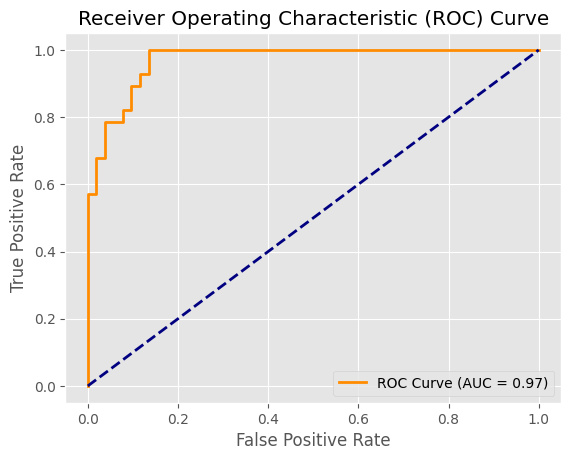

In [8]:
# Step 7: Plot ROC Curve
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Step 8: Conclusion  

In this tutorial, we successfully:  
- Implemented **Logistic Regression** for binary classification  
- Preprocessed and standardized real-world data  
- Evaluated model accuracy, precision, recall, and F1-score  
- Visualized both **decision boundaries** and **ROC curve**  

### Key Insights:
- Logistic Regression provides a **simple yet powerful baseline** for binary classification.  
- It performs well on linearly separable data and is easy to interpret.  
- Feature scaling significantly improves performance.


In [9]:
# Step 8: Conclusion
print("Logistic Regression Tutorial Complete!\n")
print("Summary:")
print(f"- Accuracy: {accuracy:.2f}")
print("- Logistic Regression performed well on binary classification.")
print("- The decision boundary clearly separates the two classes based on Age and Salary.")
print("- ROC Curve shows model’s discriminative ability.")

Logistic Regression Tutorial Complete!

Summary:
- Accuracy: 0.89
- Logistic Regression performed well on binary classification.
- The decision boundary clearly separates the two classes based on Age and Salary.
- ROC Curve shows model’s discriminative ability.


## Conclusion  

This tutorial demonstrated how to implement and evaluate a Logistic Regression model on the Social Network Ads dataset.  
We covered:
- Data preprocessing and feature scaling  
- Model training and evaluation using accuracy, precision, recall, and F1-score  
- Visualization of the decision boundary and ROC curve  

Logistic Regression proved to be an interpretable and effective baseline for binary classification tasks.  
Future improvements could include hyperparameter tuning and trying more complex models such as SVM or Random Forests.